In [1]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Veri Kümesini Yükleme
# Veri setini CSV dosyasından okuma
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
# data = pd.read_csv(url, names=columns)
data = pd.read_csv("breast_cancer.csv")

In [4]:
# Veri hakkında genel bilgiler
total_data = len(data)
print("Toplam veri sayisi:", total_data)
print(data.info())

Toplam veri sayisi: 683
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None


In [5]:
# Veri kümesinde eksik değerleri "?" ile temsil ediyor, bu değerleri NaN olarak değiştirelim
data.replace("?", np.nan, inplace=True)

In [6]:
# Eksik değerleri ortalama değerle doldurma ve sütunu sayısal bir formata dönüştürme
data["Bare Nuclei"] = data["Bare Nuclei"].astype(float)  # Önce float'a dönüştürmek gerekebilir
data["Bare Nuclei"] = data["Bare Nuclei"].fillna(data["Bare Nuclei"].median())
data["Bare Nuclei"] = data["Bare Nuclei"].astype(int)

In [7]:
# "Class" sütunundaki değerleri 0 ve 1 olarak değiştirelim (0: benign, 1: malignant)
data["Class"] = data["Class"].map({2: 0, 4: 1})

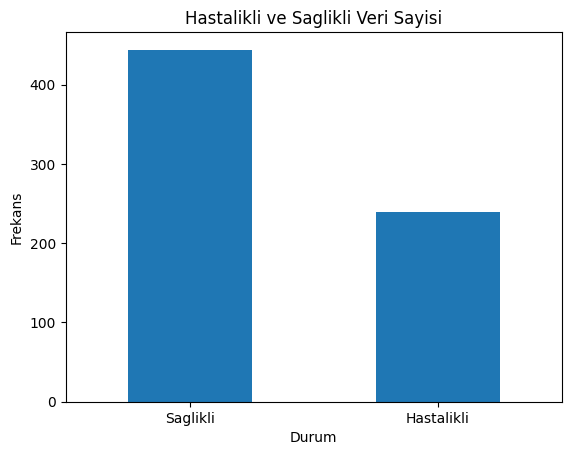

In [8]:
# Hastalikli ve saglikli veri sayilari
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Hastalikli ve Saglikli Veri Sayisi")
plt.xticks(range(2), ['Saglikli', 'Hastalikli'])
plt.xlabel("Durum")
plt.ylabel("Frekans")
plt.show()

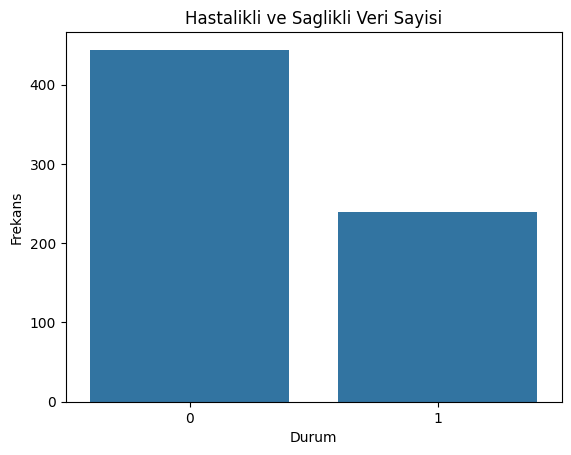

In [9]:
# Veriyi görselleştirme
sns.countplot(x='Class', data=data)
plt.title("Hastalikli ve Saglikli Veri Sayisi")
plt.xlabel("Durum")
plt.ylabel("Frekans")
plt.show()

In [10]:
# 2. Veri Ön İşleme
# Veri setini bağımsız değişkenler (X) ve hedef değişken (y) olarak bölelim
X = data.drop(["Sample code number", "Class"], axis=1)
y = data["Class"]

In [11]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. XGBoost Modelini Oluşturma
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [13]:
# 4. Modeli Eğitme
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
# 5. Modelin Değerlendirilmesi
y_pred = model.predict(X_test)

In [15]:
# 6. Performans Metriklerinin Hesaplanması
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [16]:
# Confusion matrix hesaplayalım
cm = confusion_matrix(y_test, y_pred)

In [17]:
# Veri setinin ilk 10 satırını sütunlarıyla birlikte gösterme
print("Veri Setinin Ilk 10 Satiri:\n", data.head(10).to_string())

Veri Setinin Ilk 10 Satiri:
    Sample code number  Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
0             1000025                5                        1                         1                  1                            2            1                3                1        1      0
1             1002945                5                        4                         4                  5                            7           10                3                2        1      0
2             1015425                3                        1                         1                  1                            2            2                3                1        1      0
3             1016277                6                        8                         8                  1                            3            4                3

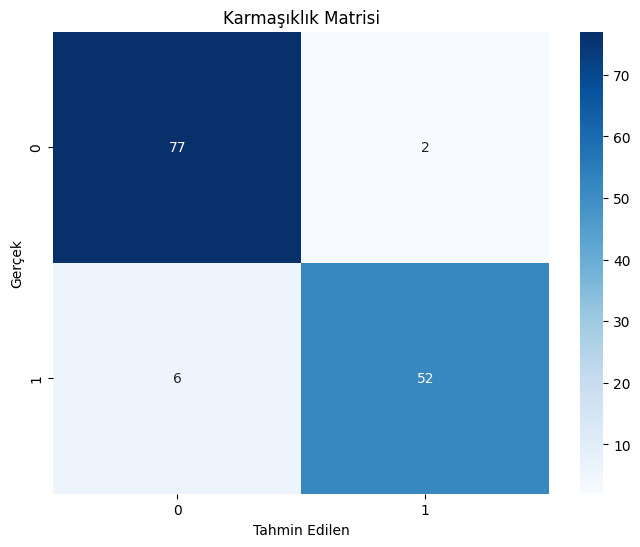

In [18]:
# 7. Görselleştirmeler
# Confusion matrix görselleştirmesi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matrisi")
plt.show()

In [19]:
# Diğer performans metriklerini gösterelim
print("Dogruluk (Accuracy):", accuracy)
print("F1 Skoru:", f1)
print("Hassasiyet (Precision):", precision)
print("Duyarlilik (Recall):", recall)

Dogruluk (Accuracy): 0.9416058394160584
F1 Skoru: 0.9285714285714286
Hassasiyet (Precision): 0.9629629629629629
Duyarlilik (Recall): 0.896551724137931


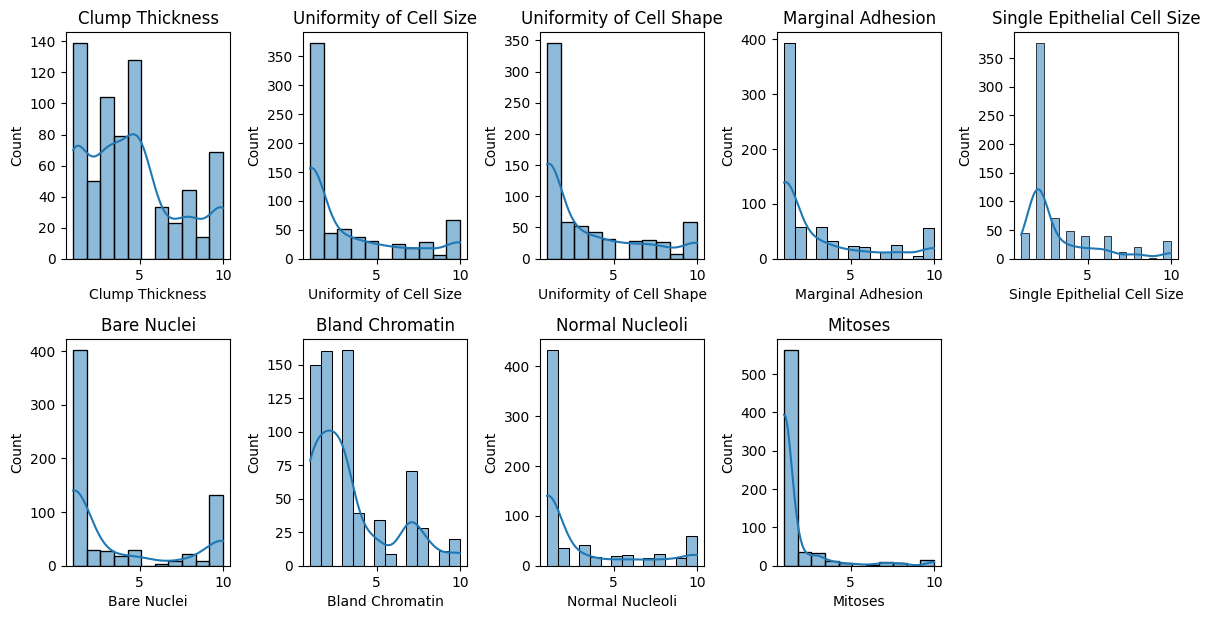

In [20]:
# Özelliklerin dağılımını görselleştirme - Histogram
plt.figure(figsize=(12, 12))
for i, feature in enumerate(X.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

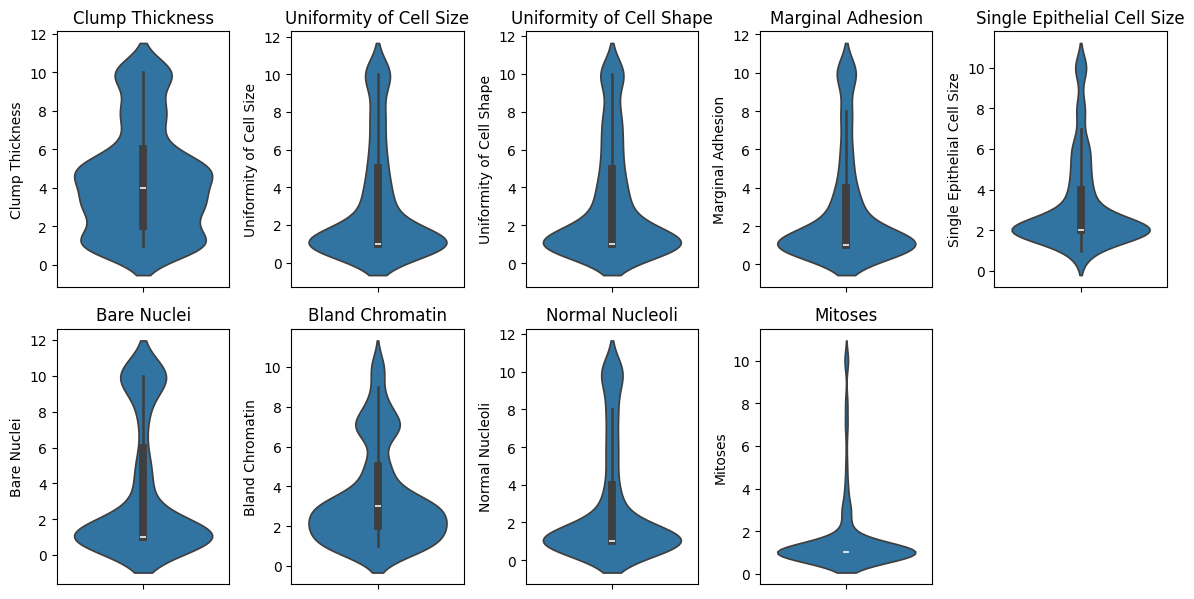

In [21]:
# Özelliklerin dağılımını görselleştirme - Violin Plot
plt.figure(figsize=(12, 12))
for i, feature in enumerate(X.columns):
    plt.subplot(4, 5, i + 1)
    sns.violinplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

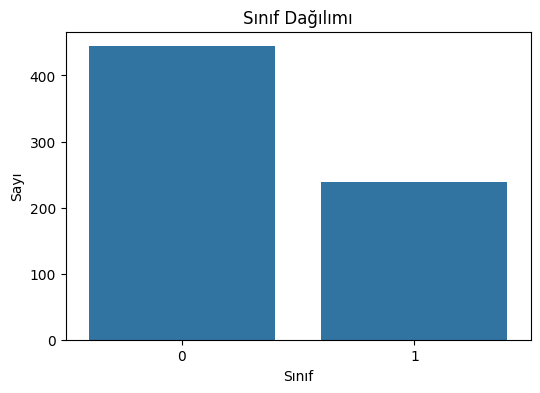

In [22]:
# Hedef değişkenin dağılımını görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Class"])
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Sayı")
plt.show()